In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor,plot_tree
#from tree import export_text
from sklearn.ensemble import RandomForestRegressor

In [3]:
df=pd.read_csv("MobilePrice_data.csv")

In [4]:
df.duplicated().sum()

0

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Brand,Name,Colour,Storage,Battery,Camera_Pixel,Selfie_cam_pixel,Display_size,RAM,Star_ratings,Users_rated,Price
0,0,0,Vivo,vivo Y22,Starlit Blue,128.0,5000.0,50,8,16.63,6.0,3.6,28.0,16499.0
1,1,1,Vivo,vivo Y15s,Mystic Blue,32.0,5000.0,13,8,16.55,3.0,4.1,456.0,9499.0
2,2,2,Vivo,Vivo Y21,Midnight Blue,64.0,5000.0,13,8,16.55,4.0,4.1,4282.0,12634.0
3,3,3,Vivo,Vivo Y33T,Mirror Black,128.0,5000.0,50,16,16.71,8.0,4.2,1117.0,17990.0
4,4,4,Vivo,Vivo Y21,Diamond Glow,64.0,5000.0,13,8,16.55,4.0,4.1,4282.0,13218.0


In [6]:
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace=True)

In [7]:
df.head()

,Brand,Name,Colour,Storage,Battery,Camera_Pixel,Selfie_cam_pixel,Display_size,RAM,Star_ratings,Users_rated,Price
0,Vivo,vivo Y22,Starlit Blue,128.0,5000.0,50,8,16.63,6.0,3.6,28.0,16499.0
1,Vivo,vivo Y15s,Mystic Blue,32.0,5000.0,13,8,16.55,3.0,4.1,456.0,9499.0
2,Vivo,Vivo Y21,Midnight Blue,64.0,5000.0,13,8,16.55,4.0,4.1,4282.0,12634.0
3,Vivo,Vivo Y33T,Mirror Black,128.0,5000.0,50,16,16.71,8.0,4.2,1117.0,17990.0
4,Vivo,Vivo Y21,Diamond Glow,64.0,5000.0,13,8,16.55,4.0,4.1,4282.0,13218.0


In [8]:
df["Price_range"]=np.where((df["Price"]<=15000),"low range",np.where((df["Price"]>15000)&(df["Price"]<=40000),
                                                                    "medium range",np.where((df["Price"]>40000)&(df["Price"]<=90000),
                                                                                           "High range","very high range")))

In [9]:
df.shape


(923, 13)

In [10]:
df["Brand"].unique()

array(['Vivo', 'One Plus', 'Realme', 'Redmi', 'Samsung', 'Poco',
       'Motorola', 'Oppo'], dtype=object)

In [11]:
df["Brand"].nunique()

8

In [12]:
df["Camera_Pixel"].unique()

array([ 50,  13,   8,  64,  48,   5,  16,   2, 108,  32,  20,  12, 200],
      dtype=int64)

In [13]:
df["Selfie_cam_pixel"].unique()

array([  8,  16,   5,  44,  32,  20,  13,  50,   2, 108,  64,  12,  48,
        25,  10,  24,  60], dtype=int64)

In [14]:
df["Battery"].unique()

array([5000., 4050., 4200., 4000., 4450., 4030., 4300., 4100., 4500.,
       4800., 3300., 3700., 3800.,  500.,  400., 6000., 5020., 4230.,
       4310., 4015., 3500., 3730., 3600., 4025., 2600., 7000.,   50.,
       5080., 4700., 4830., 3260., 3225., 3200., 3100., 4510., 4610.,
       4020., 4400., 3000., 2470., 2510., 2300., 5065., 5160.])

In [15]:
df["Storage"].unique()

array([128.,  32.,  64., 256.,   8.,   4., 512.,  16.])

In [16]:
df.isnull().sum()

Brand               0
Name                0
Colour              0
Storage             0
Battery             0
Camera_Pixel        0
Selfie_cam_pixel    0
Display_size        0
RAM                 0
Star_ratings        0
Users_rated         0
Price               0
Price_range         0
dtype: int64

In [17]:
df.dtypes

Brand                object
Name                 object
Colour               object
Storage             float64
Battery             float64
Camera_Pixel          int64
Selfie_cam_pixel      int64
Display_size        float64
RAM                 float64
Star_ratings        float64
Users_rated         float64
Price               float64
Price_range          object
dtype: object

In [18]:
df.columns

Index(['Brand', 'Name', 'Colour', 'Storage', 'Battery', 'Camera_Pixel',
       'Selfie_cam_pixel', 'Display_size', 'RAM', 'Star_ratings',
       'Users_rated', 'Price', 'Price_range'],
      dtype='object')

In [19]:
cat_col=df.dtypes[df.dtypes=="object"].index

In [20]:
cat_col

Index(['Brand', 'Name', 'Colour', 'Price_range'], dtype='object')

In [21]:
num_col=df.dtypes[df.dtypes!="object"].index

In [22]:

num_col

Index(['Storage', 'Battery', 'Camera_Pixel', 'Selfie_cam_pixel',
       'Display_size', 'RAM', 'Star_ratings', 'Users_rated', 'Price'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


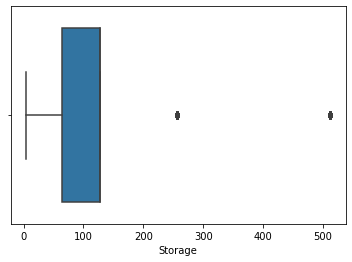

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


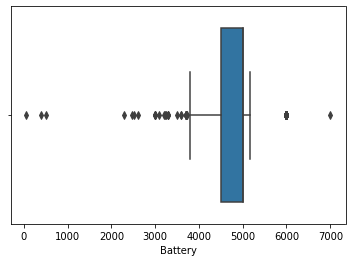

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


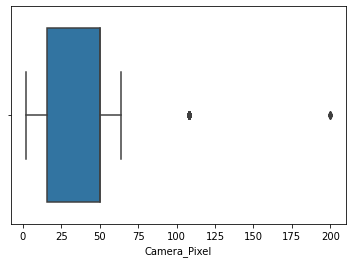

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


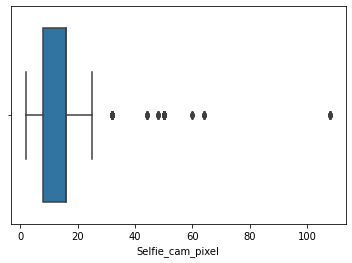

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


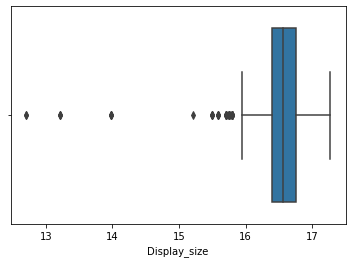

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


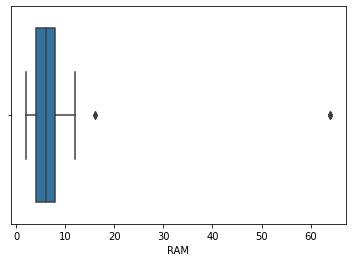

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


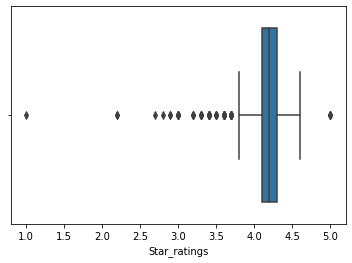

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


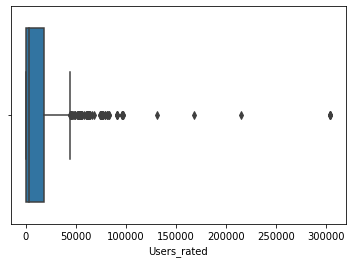

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


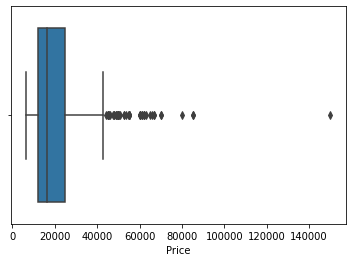

In [23]:
for i in num_col:
    sns.boxplot(df[i])
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


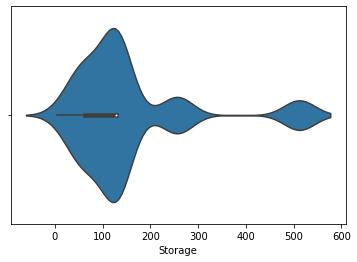

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


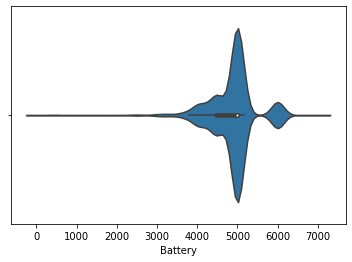

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


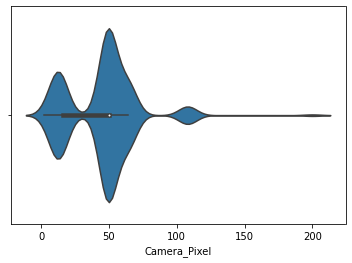

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


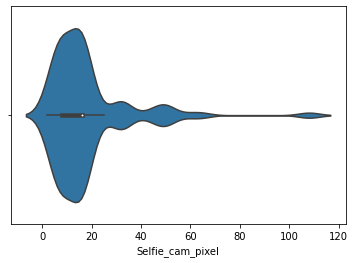

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


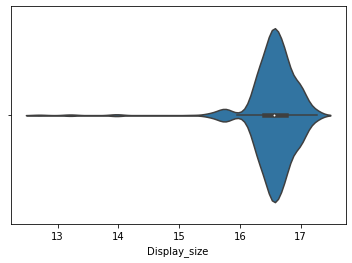

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


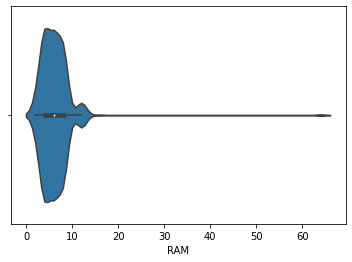

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


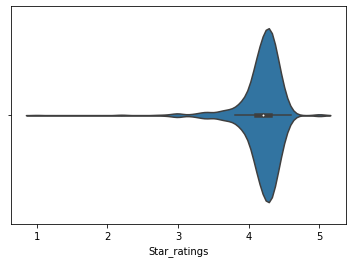

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


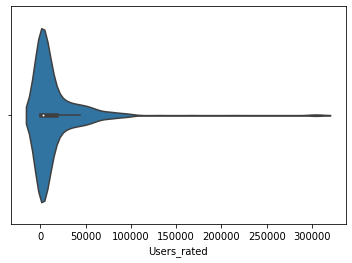

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


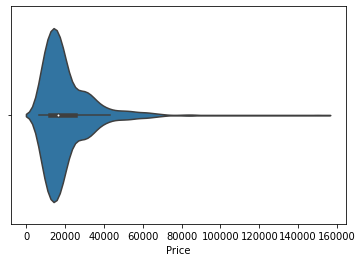

In [24]:
for i in num_col:
    sns.violinplot(df[i])
    plt.show()

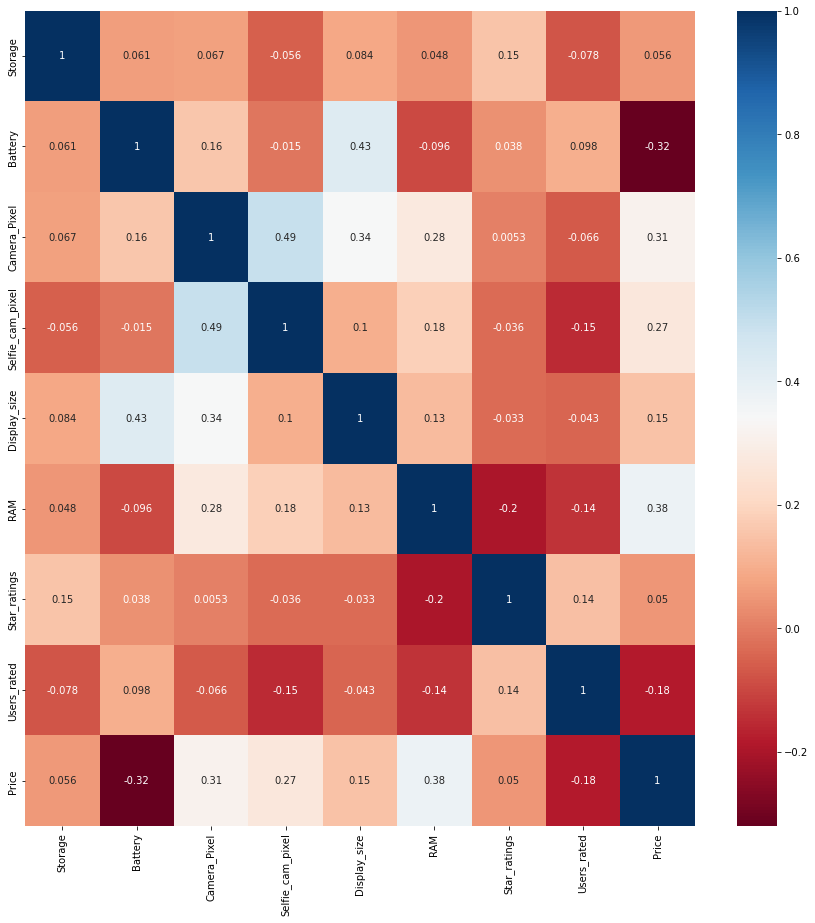

In [25]:
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,cmap="RdBu")
plt.show()

<Figure size 720x720 with 0 Axes>

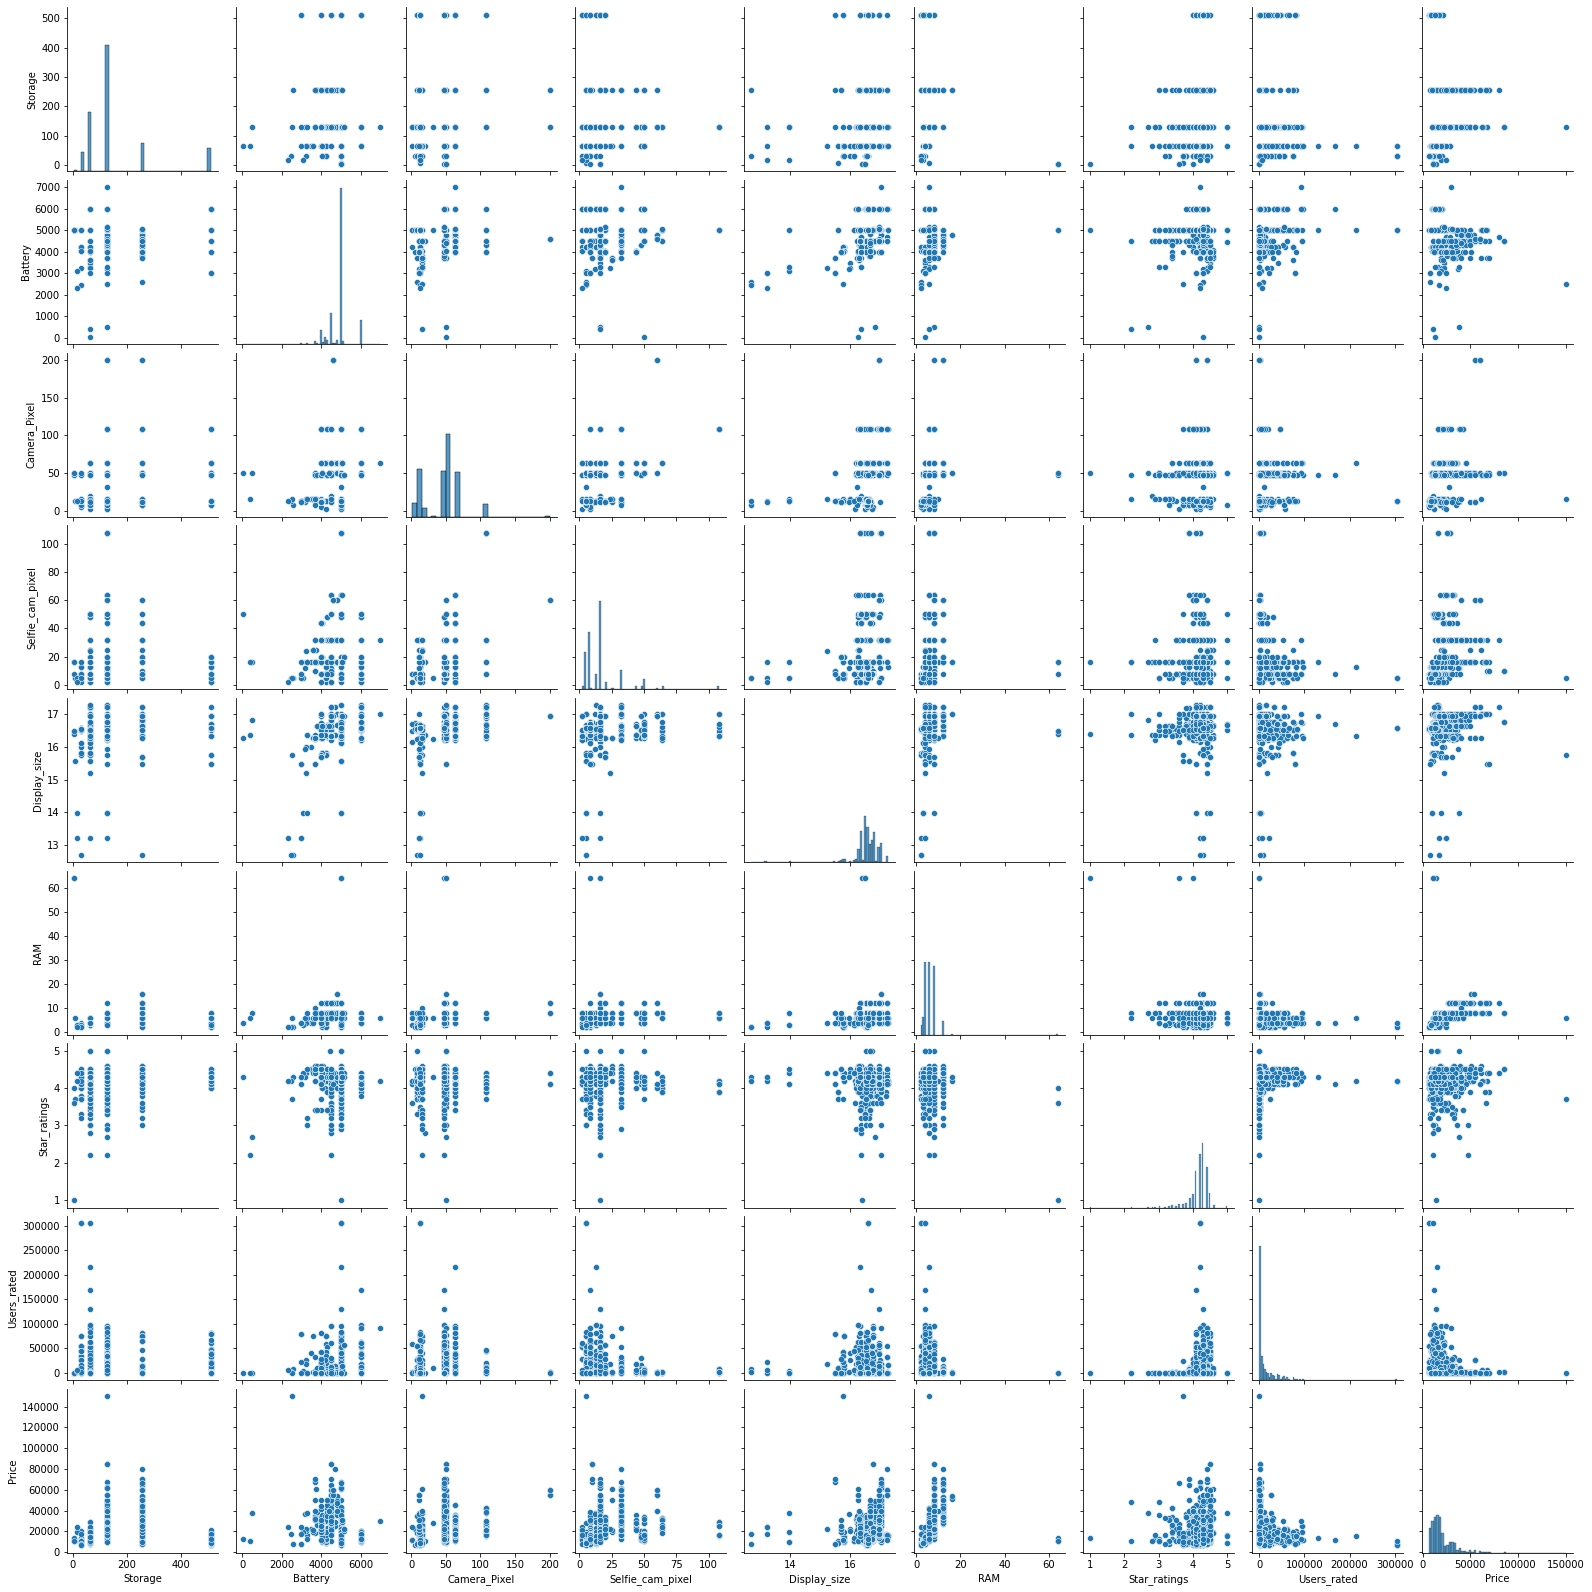

In [26]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

In [27]:
df.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Storage,923.0,154.093174,126.984738,4.0,32.0000,32.00,32.00,32.00000,32.000,64.00,64.0,128.00,128.00,256.00,512.00,512.00,512.00,512.00,512.00,512.00
Battery,923.0,4863.244854,607.093514,50.0,3000.0000,3544.00,3700.00,4000.00000,4000.000,4200.00,4500.0,5000.00,5000.00,5065.00,6000.00,6000.00,6000.00,6000.00,6000.00,7000.00
Camera_Pixel,923.0,45.310943,25.986184,2.0,8.0000,8.00,8.00,8.00000,8.000,13.00,16.0,50.00,50.00,64.00,108.00,108.00,108.00,108.00,108.00,200.00
Selfie_cam_pixel,923.0,17.899242,16.838251,2.0,2.0000,5.00,5.00,5.00000,5.000,5.00,8.0,16.00,16.00,41.60,50.00,50.00,60.00,64.00,108.00,108.00
Display_size,923.0,16.550364,0.430629,12.7,15.2716,15.70,15.75,15.79976,15.955,16.26,16.4,16.56,16.76,16.94,17.02,17.02,17.02,17.20,17.22,17.27
RAM,923.0,6.136511,4.064929,2.0,2.0000,2.00,2.00,3.00000,3.000,3.00,4.0,6.00,8.00,8.00,12.00,12.00,12.00,12.00,12.00,64.00
Star_ratings,923.0,4.181257,0.301309,1.0,3.0000,3.30,3.40,3.60000,3.610,3.90,4.1,4.20,4.30,4.40,4.50,4.50,4.50,4.50,4.60,5.00
Users_rated,923.0,15296.284940,31103.117496,1.0,5.2200,16.00,22.32,26.00000,28.000,92.60,295.0,2695.00,17639.50,46137.00,62329.00,73903.28,76161.38,87855.92,97024.22,304361.00
Price,923.0,20407.101842,12860.846369,6399.0,6913.7000,7471.56,7499.00,7999.00000,7999.000,9499.00,12064.5,16525.00,24997.00,34999.00,45449.10,49999.00,54999.00,59999.00,64558.22,149999.00


In [28]:
def out_treat(x):
    x=x.clip(upper=x.quantile(0.96))
    x=x.clip(lower=x.quantile(0.05))
    return x
    

In [29]:
df[num_col]=df[num_col].apply(out_treat)

In [30]:
df["Storage"].value_counts(normalize=True)

128.0    0.489707
64.0     0.228602
256.0    0.110509
512.0    0.089924
32.0     0.081257
Name: Storage, dtype: float64

In [31]:
df["Storage"].value_counts()

128.0    452
64.0     211
256.0    102
512.0     83
32.0      75
Name: Storage, dtype: int64

In [32]:
df["Price"].value_counts(bins=3)

(7956.999, 21999.0]    666
(21999.0, 35999.0]     174
(35999.0, 49999.0]      83
Name: Price, dtype: int64

In [33]:
df1=df.copy()

In [34]:
df

,Brand,Name,Colour,Storage,Battery,Camera_Pixel,Selfie_cam_pixel,Display_size,RAM,Star_ratings,Users_rated,Price,Price_range
0,Vivo,vivo Y22,Starlit Blue,128.0,5000.0,50.0,8.0,16.63,6.0,3.61,28.0,16499.0,medium range
1,Vivo,vivo Y15s,Mystic Blue,32.0,5000.0,13.0,8.0,16.55,3.0,4.10,456.0,9499.0,low range
2,Vivo,Vivo Y21,Midnight Blue,64.0,5000.0,13.0,8.0,16.55,4.0,4.10,4282.0,12634.0,low range
3,Vivo,Vivo Y33T,Mirror Black,128.0,5000.0,50.0,16.0,16.71,8.0,4.20,1117.0,17990.0,medium range
4,Vivo,Vivo Y21,Diamond Glow,64.0,5000.0,13.0,8.0,16.55,4.0,4.10,4282.0,13218.0,low range
...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Poco,POCO X3,Cobalt Blue,512.0,6000.0,64.0,20.0,16.94,6.0,4.30,254.0,16999.0,medium range
919,Poco,POCO X3,Steel Blue,128.0,5160.0,48.0,20.0,16.94,8.0,4.30,55611.0,21999.0,medium range
920,Poco,POCO M3,Cool Blue,512.0,6000.0,48.0,8.0,16.59,6.0,4.30,479.0,12999.0,low range
921,Poco,POCO F3,Predator Black,256.0,5065.0,64.0,16.0,16.94,8.0,4.30,14744.0,30999.0,medium range


In [35]:
df["Price_range"].value_counts()

medium range       466
low range          395
High range          61
very high range      1
Name: Price_range, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


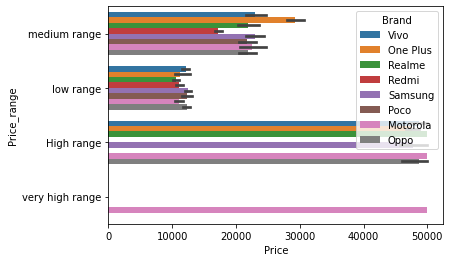

In [36]:
sns.barplot(df["Price"],df["Price_range"],hue=df["Brand"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


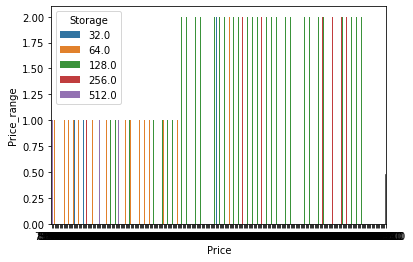

In [211]:
sns.barplot(df["Price"],df["Price_range"],hue=df["Storage"])
plt.show()

In [37]:
cat_col=df.dtypes[df.dtypes=="object"].index
cat_col

Index(['Brand', 'Name', 'Colour', 'Price_range'], dtype='object')

In [38]:

lb=LabelEncoder()

In [39]:
for i in cat_col:
    df[i]=lb.fit_transform(df[i])

In [40]:
df.dtypes

Brand                 int32
Name                  int32
Colour                int32
Storage             float64
Battery             float64
Camera_Pixel        float64
Selfie_cam_pixel    float64
Display_size        float64
RAM                 float64
Star_ratings        float64
Users_rated         float64
Price               float64
Price_range           int32
dtype: object

In [262]:
x=df.drop(columns=["Price","Name","Colour"])
y=df["Price"]

In [263]:
x

,Brand,Storage,Battery,Camera_Pixel,Selfie_cam_pixel,Display_size,RAM,Star_ratings,Users_rated,Price_range
0,7,128.0,5000.0,50.0,8.0,16.63,6.0,3.61,28.0,2
1,7,32.0,5000.0,13.0,8.0,16.55,3.0,4.10,456.0,1
2,7,64.0,5000.0,13.0,8.0,16.55,4.0,4.10,4282.0,1
3,7,128.0,5000.0,50.0,16.0,16.71,8.0,4.20,1117.0,2
4,7,64.0,5000.0,13.0,8.0,16.55,4.0,4.10,4282.0,1
...,...,...,...,...,...,...,...,...,...,...
918,3,512.0,6000.0,64.0,20.0,16.94,6.0,4.30,254.0,2
919,3,128.0,5160.0,48.0,20.0,16.94,8.0,4.30,55611.0,2
920,3,512.0,6000.0,48.0,8.0,16.59,6.0,4.30,479.0,1
921,3,256.0,5065.0,64.0,16.0,16.94,8.0,4.30,14744.0,2


In [264]:
y

0      16499.0
1       9499.0
2      12634.0
3      17990.0
4      13218.0
        ...   
918    16999.0
919    21999.0
920    12999.0
921    30999.0
922    30999.0
Name: Price, Length: 923, dtype: float64

In [265]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(646, 10)
(277, 10)
(646,)
(277,)


In [266]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=4)
selector.fit(x_train, y_train)

SelectKBest(k=4)

In [267]:
cols = selector.get_support(indices=True)
cols

array([3, 4, 6, 9], dtype=int64)

In [268]:
x_train_s = x_train.iloc[:,cols]
x_test_s = x_test.iloc[:,cols]

In [269]:
m1=LinearRegression()

In [270]:
m1.fit(x_train,y_train)

LinearRegression()

In [271]:
print(m1.score(x_train,y_train))
print(m1.score(x_test,y_test))

0.7035534375770303
0.7285468962639876


In [272]:
ypred= m1.predict(x_test)

In [273]:
r2_score(y_test,ypred)

0.7285468962639876

In [274]:
def model_metric_reg(y_test,y_pred):
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    # rmse=mean_squared_error(y_test,y_pred,squared=False)
    r2=r2_score(y_test,y_pred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 score',r2)

In [275]:
model_metric_reg(y_test,ypred)

MAE 4312.232964602687
MSE 32044793.58785459
RMSE 5660.812096144386
R2 score 0.7285468962639876


In [276]:
from sklearn.preprocessing import PolynomialFeatures 

In [277]:
poly_regs= PolynomialFeatures(degree= 2)  
x_poly= poly_regs.fit_transform(x_train)
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y_train) 

LinearRegression()

In [278]:
x_poly.shape

(646, 66)

In [279]:
x_poly1= poly_regs.transform(x_test)


In [280]:
print(lin_reg_2.score(x_poly,y_train))
print(lin_reg_2.score(x_poly1,y_test))

0.8856448135630081
0.9043816519787584


In [281]:
y_pred3=lin_reg_2.predict(x_poly1)

In [282]:
model_metric_reg(y_test,y_pred3)

MAE 2478.380892613938
MSE 11287659.575011285
RMSE 3359.711233872829
R2 score 0.9043816519787584


In [92]:
import statsmodels.api as sm 

In [283]:
x1=sm.add_constant(x)
reg=sm.OLS(y, x1).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     227.8
Date:                Fri, 25 Nov 2022   Prob (F-statistic):          4.92e-240
Time:                        16:02:39   Log-Likelihood:                -9301.0
No. Observations:                 923   AIC:                         1.862e+04
Df Residuals:                     912   BIC:                         1.868e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8.234e+04   1.43e+04  

In [284]:
x_ols=df.drop(columns=["Price","Name","Colour","Brand"])


In [285]:
x1=sm.add_constant(x_ols)
reg=sm.OLS(y, x1).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     253.4
Date:                Fri, 25 Nov 2022   Prob (F-statistic):          3.13e-241
Time:                        16:02:55   Log-Likelihood:                -9301.0
No. Observations:                 923   AIC:                         1.862e+04
Df Residuals:                     913   BIC:                         1.867e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8.262e+04   1.43e+04  

#### Ridge

In [286]:
from sklearn.linear_model import Ridge,Lasso

In [287]:
l=Lasso(alpha=0.1)
l.fit(x_train,y_train)
y_pred=l.predict(x_test)

In [288]:
print(l.score(x_train,y_train))
print(l.score(x_test,y_test))

0.7035534336541776
0.7285430311992188


In [289]:
r=Ridge(alpha=0.1)
r.fit(x_train,y_train)
y_pred=l.predict(x_test)

In [290]:
print(r.score(x_train,y_train))
print(r.score(x_test,y_test))

0.7035531625112985
0.7285404661812411


#### decision tree

In [291]:
m=DecisionTreeRegressor(criterion='squared_error',max_depth=4,min_samples_split=15)

In [292]:
m.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=15)

In [293]:
m.fit(x_train_s,y_train)     # for selected features

DecisionTreeRegressor(max_depth=4, min_samples_split=15)

In [294]:
print(m.score(x_train_s,y_train))
print(m.score(x_test_s,y_test))

0.8440314763368841
0.867195979517806


In [295]:
print(m.score(x_train,y_train))
print(m.score(x_test,y_test))

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Battery
- Brand
- Display_size
- Star_ratings
- Storage
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 10 features, but DecisionTreeRegressor is expecting 4 features as input.

In [218]:
y_pred=m.predict(x_test)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Battery
- Display_size
- Star_ratings
- Storage
- Users_rated

  warnings.warn(message, FutureWarning)


ValueError: X has 9 features, but DecisionTreeRegressor is expecting 4 features as input.

In [296]:
model_metric_reg(y_test,y_pred)

MAE 4312.2231675689245
MSE 32045249.85525775
RMSE 5660.8523965263175
R2 score 0.7285430311992188


In [104]:
params={"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
       "max_depth" :[5, 7,9,11],
       "min_samples_split":[20, 50,100, 200],
       "min_samples_leaf": [5,10,15,30]}

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
dtg=DecisionTreeRegressor()

dt_grid=GridSearchCV(estimator=dtg, param_grid=params, cv=10, n_jobs=-1,
                     verbose=2)
dt_grid.fit(x_train,y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [5, 10, 15, 30],
                         'min_samples_split': [20, 50, 100, 200]},
             verbose=2)

In [107]:
dt_grid.best_estimator_


DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=50)

In [108]:
dt_grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 50}

In [297]:
m=DecisionTreeRegressor(criterion='squared_error',max_depth=9,min_samples_split=50,min_samples_leaf= 5)

In [298]:
m.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=50)

In [299]:
print(m.score(x_train,y_train))
print(m.score(x_test,y_test))

0.8678162702375143
0.8634602812513716


In [300]:
y_pred=m.predict(x_test)

In [301]:
model_metric_reg(y_test,y_pred)

MAE 2628.113799918651
MSE 16118390.409337781
RMSE 4014.7715264181325
R2 score 0.8634602812513716


### random forest

In [302]:
m2= RandomForestRegressor(criterion='squared_error',n_estimators=70,
                            max_depth=3,min_samples_split=15)

In [303]:
m2.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, min_samples_split=15, n_estimators=70)

In [304]:
print(m2.score(x_train,y_train))
print(m2.score(x_test,y_test))

0.8437582006200817
0.8711687329647461


In [305]:
y_pred1=m2.predict(x_test)

In [306]:
model_metric_reg(y_test,y_pred1)

MAE 2986.3944996516
MSE 15208414.650588492
RMSE 3899.7967447789497
R2 score 0.8711687329647461


In [307]:
Imp=m2.feature_importances_
Imp

array([1.27566712e-03, 7.42376886e-04, 4.52814205e-02, 4.13009192e-04,
       4.34264092e-03, 1.89941013e-03, 3.96263191e-01, 5.97291584e-04,
       2.91635286e-04, 5.48893357e-01])

In [308]:
r=pd.DataFrame({"Var": x_train.columns, "Imp": m2.feature_importances_})

In [309]:
r

,Var,Imp
0,Brand,0.001276
1,Storage,0.000742
2,Battery,0.045281
3,Camera_Pixel,0.000413
4,Selfie_cam_pixel,0.004343
5,Display_size,0.001899
6,RAM,0.396263
7,Star_ratings,0.000597
8,Users_rated,0.000292
9,Price_range,0.548893


In [310]:
Var=x.columns

In [311]:
feat_mean=Imp.mean()
feat_mean

0.1

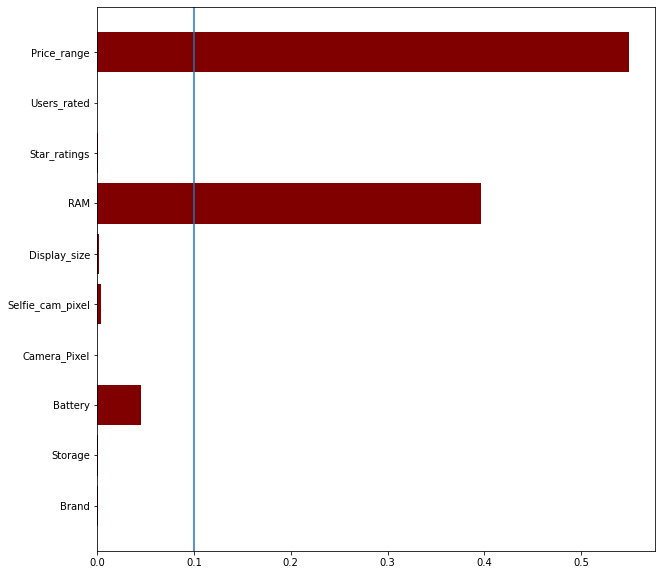

In [312]:
plt.figure(figsize=(10,10))
plt.barh(Var,Imp,color='maroon')
plt.axvline(x=feat_mean)
plt.show()

In [124]:
params={"criterion": ["squared_error", "absolute_error"],
        "n_estimators":[100,150,200,250],
       "max_depth" :[7,9,11],
       "min_samples_split":[20, 50,100, 200],
        "bootstrap":[True],
        "oob_score":[True],
       "min_samples_leaf": [5,10,15,30]}

In [125]:
rf1=RandomForestRegressor(random_state=0)
Grf=GridSearchCV(estimator=rf1, param_grid=params, cv=5, n_jobs=-1, verbose=1, 
             scoring="neg_mean_squared_error")

In [126]:
Grf.fit(x_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [7, 9, 11],
                         'min_samples_leaf': [5, 10, 15, 30],
                         'min_samples_split': [20, 50, 100, 200],
                         'n_estimators': [100, 150, 200, 250],
                         'oob_score': [True]},
             scoring='neg_mean_squared_error', verbose=1)

In [127]:
Grf.best_params_

{'bootstrap': True,
 'criterion': 'squared_error',
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 250,
 'oob_score': True}

In [313]:
m3=RandomForestRegressor(bootstrap=True,criterion="squared_error",max_depth=11,min_samples_leaf=5,min_samples_split=20,
                        n_estimators=250,oob_score=True)

In [314]:
m3.fit(x_train,y_train)

RandomForestRegressor(max_depth=11, min_samples_leaf=5, min_samples_split=20,
                      n_estimators=250, oob_score=True)

In [315]:
print(m3.score(x_train,y_train))
print(m3.score(x_test,y_test))

0.9194104060468069
0.9106178324514533


In [316]:
m3.fit(x_train_s,y_train)     # for selected features

RandomForestRegressor(max_depth=11, min_samples_leaf=5, min_samples_split=20,
                      n_estimators=250, oob_score=True)

In [317]:
print(m3.score(x_train_s,y_train))
print(m3.score(x_test_s,y_test))

0.8492708069319842
0.8711300474587917


### XGBoost

In [131]:
from xgboost import XGBRegressor

In [318]:
m2=XGBRegressor(n_estimators=100,max_depth=4,reg_lambda=0.2,eta=0.3,eval_metric='rmse',
                gamma=0.5,objective='reg:linear', random_state=0,
                reg_alpha=0)

In [319]:
m2.fit(x_train,y_train)

[16:04:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric='rmse', gamma=0.5, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, ...)

In [320]:
print(m2.score(x_train,y_train))
print(m2.score(x_test,y_test))

0.997192132932023
0.9328356832046013


In [321]:
ypred=m2.predict(x_test)

In [322]:
model_metric_reg(ypred,y_test)

MAE 1478.9801038611236
MSE 7928686.902290503
RMSE 2815.7924110790736
R2 score 0.9269732919123318


In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold,KFold

In [138]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(m2, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [139]:
scores.mean()

-1602.2342126295541

In [140]:
cv = KFold(n_splits=10)
scores = cross_val_score(m2, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [141]:
scores.mean()

-3480.280140495568

In [142]:
params={"gamma":[0.1,0.2,0.3,0.5],
       'eta':[0.1,0.2,0.3,0.5],
       'reg_lambda':[0.1,0.2,0.3],
       'max_depth':[4,5,6]}
print(params)

{'gamma': [0.1, 0.2, 0.3, 0.5], 'eta': [0.1, 0.2, 0.3, 0.5], 'reg_lambda': [0.1, 0.2, 0.3], 'max_depth': [4, 5, 6]}


In [143]:
m2=XGBRegressor(objective="reg:linear",eval_metric='rmse')
gs=GridSearchCV(estimator=m2,param_grid=params,scoring='neg_mean_absolute_error',cv=5)
gs.fit(x_train,y_train)

[14:14:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:14:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:14:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:15:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:15:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:15:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:15:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:15:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:16:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:16:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:16:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:16:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:16:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:16:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:17:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[14:17:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_c...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='reg:linear', predictor=None,
                                    random_state=None, reg_alpha=None, ...),
             param_grid={'eta': [0.1, 0.2, 0.3, 0.5],
                         'gamma': [0.1, 0.2, 0.3, 0.5], 'max_depth': [4, 5, 6],
                         'reg_lambda': [0.1, 0.2, 0.3]},
             scoring='neg_mean_absolute_error')

In [144]:
gs.best_params_

{'eta': 0.3, 'gamma': 0.1, 'max_depth': 5, 'reg_lambda': 0.1}

In [323]:
m2=XGBRegressor(n_estimators=100,max_depth=5,reg_lambda=0.1,eta=0.3,eval_metric='rmse',
                gamma=0.1,objective='reg:linear', random_state=0,
                reg_alpha=0)

In [324]:
m2.fit(x_train,y_train)

[16:09:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric='rmse', gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, ...)

In [325]:
print(m2.score(x_train,y_train))
print(m2.score(x_test,y_test))

0.999164029827887
0.939192175540766


In [326]:
ypred=m2.predict(x_test)

In [327]:
model_metric_reg(ypred,y_test)

MAE 1356.982242074684
MSE 7178308.726275005
RMSE 2679.2365939339893
R2 score 0.933364652972401


### adaboost

In [251]:
from sklearn.ensemble import AdaBoostRegressor

In [328]:
m3=RandomForestRegressor(bootstrap=True,criterion="poisson",max_depth=11,min_samples_leaf=5,min_samples_split=20,
                        n_estimators=150,oob_score=True)


In [329]:
m3=RandomForestRegressor(bootstrap=True,criterion="squared_error",max_depth=11,min_samples_leaf=5,min_samples_split=20,
                        n_estimators=150,oob_score=True)


In [330]:
m1 = AdaBoostRegressor(base_estimator=m3,n_estimators=100)

In [331]:
m1.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=11,
                                                       min_samples_leaf=5,
                                                       min_samples_split=20,
                                                       n_estimators=150,
                                                       oob_score=True),
                  n_estimators=100)

In [332]:
ypred=m1.predict(x_test)

In [333]:
print(m1.score(x_train,y_train))
print(m1.score(x_test,y_test))

0.9695272182721444
0.9251945792734807


In [334]:
model_metric_reg(ypred,y_test)

MAE 2193.2591474845344
MSE 8830712.31620593
RMSE 2971.6514459481837
R2 score 0.9107333065337334


In [158]:
params = {'n_estimators':[50,70,80,90,100],
         'base_estimator':[DecisionTreeRegressor(max_depth=1),
                          RandomForestRegressor(criterion='squared_error',n_estimators=70,
                            max_depth=3,min_samples_split=15),
                          RandomForestRegressor(criterion='squared_error',n_estimators=150,
                            max_depth=5,min_samples_split=20)]}
params

{'n_estimators': [50, 70, 80, 90, 100],
 'base_estimator': [DecisionTreeRegressor(max_depth=1),
  RandomForestRegressor(max_depth=3, min_samples_split=15, n_estimators=70),
  RandomForestRegressor(max_depth=5, min_samples_split=20, n_estimators=150)]}

In [159]:
ada = AdaBoostRegressor()
gs1 = GridSearchCV(estimator=ada, param_grid=params,cv=5)
gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=1),
                                            RandomForestRegressor(max_depth=3,
                                                                  min_samples_split=15,
                                                                  n_estimators=70),
                                            RandomForestRegressor(max_depth=5,
                                                                  min_samples_split=20,
                                                                  n_estimators=150)],
                         'n_estimators': [50, 70, 80, 90, 100]})

In [160]:
gs1.best_params_

{'base_estimator': RandomForestRegressor(max_depth=5, min_samples_split=20, n_estimators=150),
 'n_estimators': 90}

In [335]:
r= RandomForestRegressor(max_depth=5, min_samples_split=20, n_estimators=150)
gs=AdaBoostRegressor(base_estimator=r,n_estimators=100)
gs.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=5,
                                                       min_samples_split=20,
                                                       n_estimators=150),
                  n_estimators=100)

In [336]:
print(gs.score(x_train,y_train))
print(gs.score(x_test,y_test))

0.912550885170033
0.8968483544502319


In [163]:
!pip install pyod

^C


In [337]:
dt1 = DecisionTreeRegressor(max_depth=4,min_samples_split=20,criterion='squared_error')  # decision stump
m1 = AdaBoostRegressor(base_estimator=dt1,n_estimators=60)
m1.fit(x_train,y_train)
print(m1.score(x_train,y_train))
print(m1.score(x_test,y_test))

0.8955940893585694
0.8844957532959742


### svm

In [322]:
from sklearn.svm import SVR

In [324]:
m2=SVR(kernel='linear',C=1)

In [325]:
m2.fit(x_train,y_train)

SVR(C=1, kernel='linear')

In [326]:
print(m2.score(x_train,y_train))
print(m2.score(x_test,y_test))

0.35857662054138684
0.3028220027269125


In [328]:
m2=SVR(kernel='rbf',C=1,gamma=0.1)

In [329]:
m2.fit(x_train,y_train)

SVR(C=1, gamma=0.1)

In [330]:
print(m2.score(x_train,y_train))
print(m2.score(x_test,y_test))

-0.09696553875071601
-0.09051007816377576


In [331]:
#m2=SVR(kernel='poly',C=1,gamma=0.1,degree=4)


In [ ]:
m2.fit(x_train,y_train)

In [ ]:
print(m2.score(x_train,y_train))
print(m2.score(x_test,y_test))

### KNN

In [115]:
from sklearn.neighbors import KNeighborsRegressor

In [131]:
m=KNeighborsRegressor(n_neighbors=2)

In [132]:
m.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [133]:
print(m.score(x_train,y_train))
print(m.score(x_test,y_test))

0.8516946289985179
0.5219612804527753
